<a href="https://colab.research.google.com/github/amina04/CNN-lstm/blob/main/CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **chargement des fichiers qui sont sur drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


la bibliothéque pandas nous donne le droit de travailler avec la format csv.
On utilise panda pour ouvrir la dataset

In [ ]:
import pandas as pd  

In [ ]:
import tensorflow as tf

**Donner les noms des column au dataset et spécifier la liste des  string contenu **

In [ ]:

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}    

## **1.Load the data**

In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTrain+.txt',names=featureV)
data_train_2=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest-21.txt',names=featureV)
data_valid=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest+.txt',names=featureV)

In [ ]:
data_train.shape

(125973, 43)

In [ ]:
data_train=data_train.append(data_train_2)

In [ ]:
data_train.shape

(137823, 43)

In [ ]:
print(f"numbers of protocol_type: {len(data_train['protocol_type'].value_counts())}")
print(f"number of 'service' in train datasets: {len(data_train.service.value_counts())}")
print(f"number of 'flag' in train datasets: {len(data_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


In [ ]:
data_train.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'snmpguess', 'processtable', 'saint',
       'mscan', 'apache2', 'httptunnel', 'mailbomb', 'snmpgetattack',
       'worm', 'sendmail', 'xlock', 'xterm', 'xsnoop', 'ps', 'named',
       'udpstorm', 'sqlattack'], dtype=object)

In [ ]:
data_train.shape

(137823, 43)

In [ ]:
df_train_obj = data_train.iloc[:, :-2].select_dtypes(include='object')
df_train_num = data_train.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_train_num.shape}")
print(f"shape of object features: {df_train_obj.shape}")

shape of numeric features: (137823, 38)
shape of object features: (137823, 3)


In [ ]:
df_valid_obj = data_valid.iloc[:, :-2].select_dtypes(include='object')
df_valid_num = data_valid.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_valid_num.shape}")
print(f"shape of object features: {df_valid_obj.shape}")

shape of numeric features: (22544, 38)
shape of object features: (22544, 3)


In [ ]:
df_train_obj.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


encoder les labels 0 pour normal et 1 attack

In [ ]:
data_train['label']=data_train['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_train['label'] = data_train['label'].replace(binary_attack[i], 1)
y_train=data_train['label']
data_valid['label']=data_valid['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_valid['label'] = data_valid['label'].replace(binary_attack[i], 1)
y_valid=data_valid['label']
#supprimer la colonne la bel de dataset car on a créer une copier déja ===>séparation
del data_train['label']
del data_valid['label']


In [ ]:
y_train.shape

(137823,)

## **2.Working with Validation data -Numericalization-**

In [ ]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#encoder juste les les column qui contient string
data_train_enc = enc.fit_transform(df_train_obj).toarray()
train_enc_features = enc.get_feature_names_out(input_features=df_train_obj.columns)
data_valid_enc = enc.transform(df_valid_obj).toarray()
test_enc_features = enc.get_feature_names_out(input_features=df_valid_obj.columns)

#concatiner string avec num columns
X_train_enc = np.c_[df_train_num, data_train_enc]
X_valid_enc = np.c_[df_valid_num, data_valid_enc]
print(f"X_train_enc shape: {X_train_enc.shape}")
print(f"X_test_enc shape: {X_valid_enc.shape}")
######################################
#encoder les labels
y_train=pd.get_dummies(y_train)
y_valid=pd.get_dummies(y_valid)
y_train.head()

X_train_enc shape: (137823, 122)
X_test_enc shape: (22544, 122)


,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_enc)
X_valid_scaler = scaler.fit_transform(X_valid_enc)
########################
y_train=scaler.fit_transform(y_train)
y_valid=scaler.fit_transform(y_valid)
y_train[0]

array([1., 0.])

In [ ]:
x_train = np.reshape(X_train_scaler, (X_train_scaler.shape[0], X_train_scaler.shape[1], 1))

#x_train[0]

In [ ]:
y_valid.shape

(22544, 2)

In [ ]:
x_valid = np.reshape(X_valid_scaler, (X_valid_scaler.shape[0],X_valid_scaler.shape[1], 1))

y_valid.shape

(22544, 2)

## **3.Define the model**

In [ ]:
#instancier le modéle
from tensorflow.keras.models import Sequential
model=Sequential()
#Créer la couche entrée totalement connecté avec la couche dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, AveragePooling1D,BatchNormalization,SpatialDropout1D,MaxPool1D
from tensorflow.keras.layers import LeakyReLU

In [ ]:
model.add(Conv1D(32,kernel_size =5,padding="same",input_shape =(x_train.shape[1],1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.3))
model.add(Dropout(0.2))
# #2em block
model.add(Conv1D(64,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.2))
#3em block
model.add(Conv1D(128,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.2))
#4em block
model.add(Conv1D(256,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.2))
#5em block
model.add(Conv1D(512,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(units=30, activation="relu"))

#model.add(Dropout(0.3))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2,activation="sigmoid"))
model.summary() #sert afficher résumés

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 32)           192       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 122, 32)           0         
                                                                 
 batch_normalization (BatchN  (None, 122, 32)          128       
 ormalization)                                                   
                                                                 
 average_pooling1d (AverageP  (None, 61, 32)           0         
 ooling1D)                                                       
                                                                 
 dropout (Dropout)           (None, 61, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 64)            1

## **4.Compile the model**


In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy',keras.metrics.Precision()])

## **5.Fit the model**

**The loss function** is perhaps the most important
aspect of neural networks. The gradients are calculated
using the loss function, and the gradient is used to update
the neural network biases, increasing or decreasing the
neural network weights


In [ ]:
#model.fit(x_train, y_train, epochs = 100, batch_size =1000)
#model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1))
from keras.callbacks import EarlyStopping
#history = model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks = [EarlyStopping(monitor='val_loss', patience=5)])
history = model.fit(x_train, y_train, epochs =100,batch_size =256,validation_data=(x_valid, y_valid))


Epoch 1/100
539/539 [==============================] - 19s 18ms/step - loss: 0.1937 - accuracy: 0.9263 - precision: 0.9256 - val_loss: 0.6404 - val_accuracy: 0.7306 - val_precision: 0.7404
Epoch 2/100
539/539 [==============================] - 8s 15ms/step - loss: 0.1266 - accuracy: 0.9558 - precision: 0.9553 - val_loss: 0.2567 - val_accuracy: 0.9117 - val_precision: 0.9123
Epoch 3/100
539/539 [==============================] - 8s 14ms/step - loss: 0.1073 - accuracy: 0.9607 - precision: 0.9604 - val_loss: 0.2255 - val_accuracy: 0.9092 - val_precision: 0.9095
Epoch 4/100
539/539 [==============================] - 8s 14ms/step - loss: 0.0952 - accuracy: 0.9647 - precision: 0.9647 - val_loss: 0.2012 - val_accuracy: 0.9230 - val_precision: 0.9234
Epoch 5/100
539/539 [==============================] - 8s 14ms/step - loss: 0.0875 - accuracy: 0.9669 - precision: 0.9667 - val_loss: 0.1850 - val_accuracy: 0.9340 - val_precision: 0.9332
Epoch 6/100
539/539 [==============================] - 8s 1

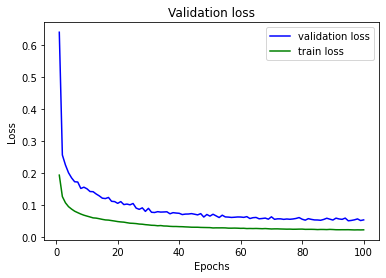

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

loss_val = history.history['val_loss']
acc_val = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_val, 'g', label='train loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

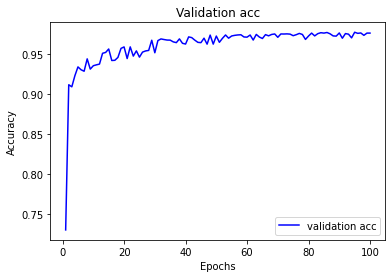

In [ ]:
acc_val = history.history['val_accuracy']

epochs = range(1,101)
plt.plot(epochs, acc_val, 'b', label='validation acc')

plt.title('Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()